# Import Libraries and Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn

In [57]:
medical = pd.read_csv('../../data/raw/02_medical_records.csv')

# Data Exploratory

In [58]:
print(medical.shape)
medical.head()

(918, 12)


,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [59]:
medical.describe()

,age,resting_BP,cholesterol,fasting_BS,max_HR,old_peak,cv_issue
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [60]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              918 non-null    int64  
 1   gender           918 non-null    object 
 2   chest_pain       918 non-null    object 
 3   resting_BP       918 non-null    int64  
 4   cholesterol      918 non-null    int64  
 5   fasting_BS       918 non-null    int64  
 6   resting_ECG      918 non-null    object 
 7   max_HR           918 non-null    int64  
 8   exercise_angina  918 non-null    object 
 9   old_peak         918 non-null    float64
 10  ST_slope         918 non-null    object 
 11  cv_issue         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [61]:
medical.duplicated().sum()

0

In [62]:
medical.isna().sum()

age                0
gender             0
chest_pain         0
resting_BP         0
cholesterol        0
fasting_BS         0
resting_ECG        0
max_HR             0
exercise_angina    0
old_peak           0
ST_slope           0
cv_issue           0
dtype: int64

1    508
0    410
Name: cv_issue, dtype: int64


<Axes: ylabel='cv_issue'>

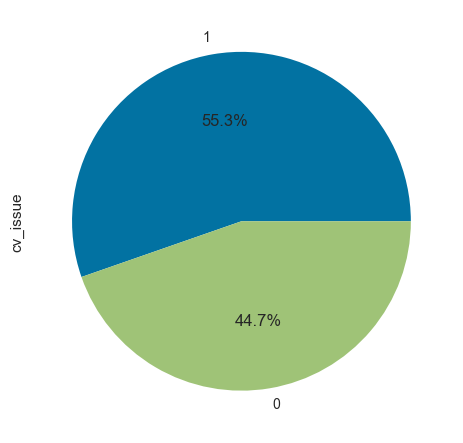

In [63]:
print(medical["cv_issue"].value_counts())
medical["cv_issue"].value_counts().plot(kind='pie', autopct='%1.1f%%')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'resting_BP'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'fasting_BS'}>,
        <Axes: title={'center': 'max_HR'}>,
        <Axes: title={'center': 'old_peak'}>],
       [<Axes: title={'center': 'cv_issue'}>, <Axes: >, <Axes: >]],
      dtype=object)

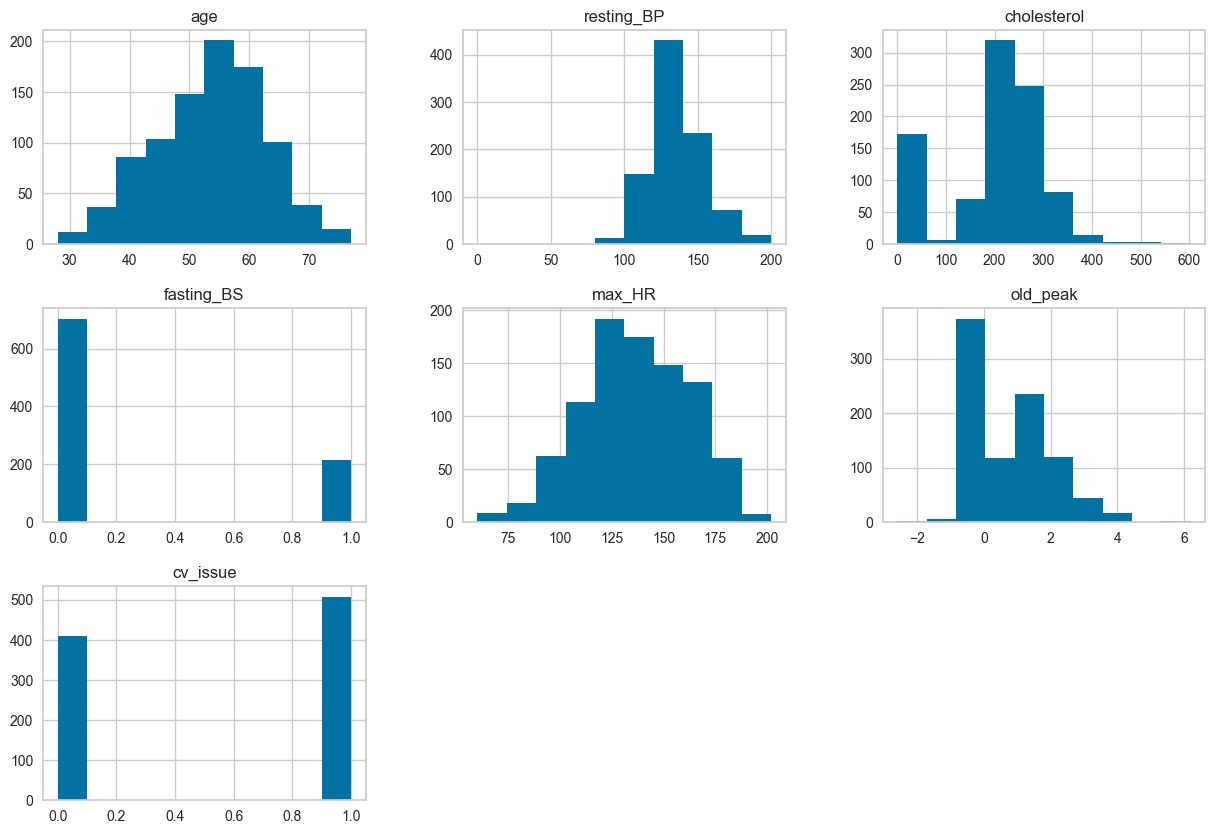

In [64]:
medical.hist(figsize=(15,10))

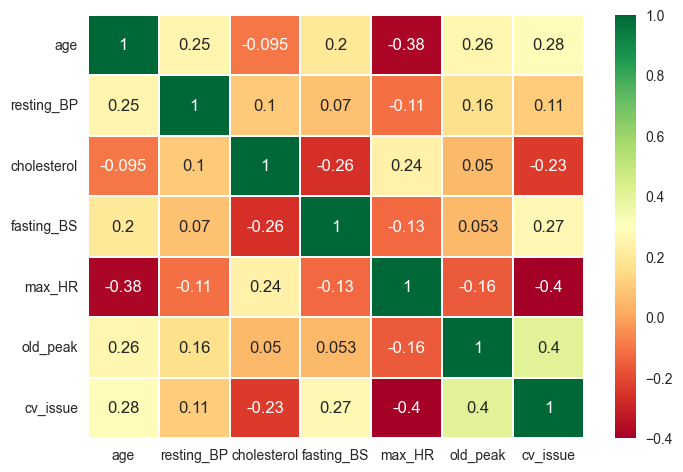

In [65]:
numeric_columns = medical.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

<Axes: xlabel='cv_issue', ylabel='max_HR'>

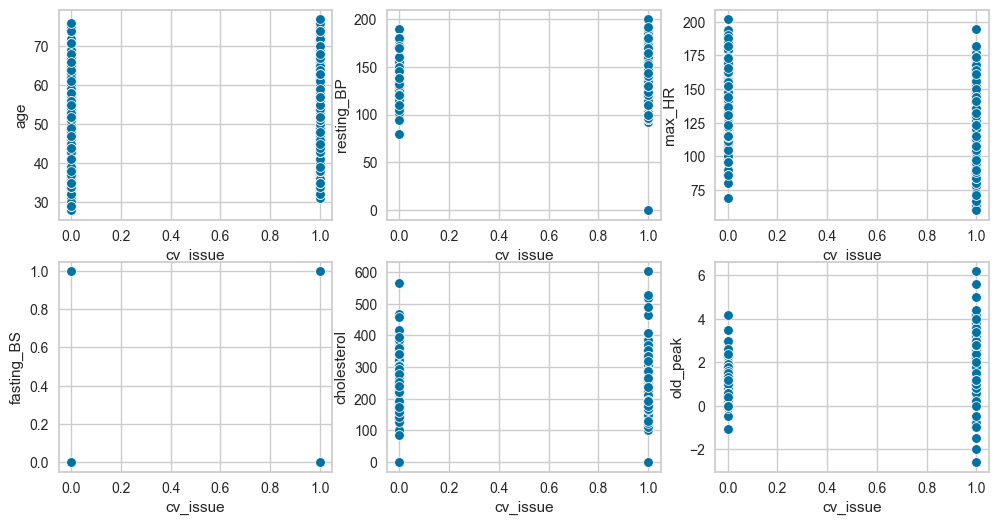

In [66]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (12, 6))

sns.scatterplot(x="cv_issue", y="age", data=medical, ax=ax[0][0])
sns.scatterplot(x="cv_issue", y="resting_BP", data=medical, ax=ax[0][1])
sns.scatterplot(x="cv_issue", y="cholesterol", data=medical, ax=ax[1][1])
sns.scatterplot(x="cv_issue", y="fasting_BS", data=medical, ax=ax[1][0])
sns.scatterplot(x="cv_issue", y="old_peak", data=medical, ax=ax[1][2])
sns.scatterplot(x="cv_issue", y="max_HR", data=medical, ax=ax[0][2])


In [67]:
non_numeric = medical.select_dtypes(include=['object'])
for column in non_numeric.columns:
    print(f"Value counts for column '{column}':\n{non_numeric[column].value_counts()}\n")

Value counts for column 'gender':
M    725
F    193
Name: gender, dtype: int64

Value counts for column 'chest_pain':
ASY    496
NAP    203
ATA    173
TA      46
Name: chest_pain, dtype: int64

Value counts for column 'resting_ECG':
Normal    552
LVH       188
ST        178
Name: resting_ECG, dtype: int64

Value counts for column 'exercise_angina':
N    547
Y    371
Name: exercise_angina, dtype: int64

Value counts for column 'ST_slope':
Flat    460
Up      395
Down     63
Name: ST_slope, dtype: int64



# Data Preparation and Modelling

In [13]:
model = setup(data = medical, target = 'cv_issue', normalize = True, normalize_method='minmax', train_size = 0.8, remove_outliers=True, bin_numeric_features=['age', 'max_HR'],session_id=123, log_experiment=True, experiment_name='medical', fold=10)

,Description,Value
0,Session id,123
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(881, 19)"
5,Transformed train set shape,"(697, 19)"
6,Transformed test set shape,"(184, 19)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


2023/08/20 11:03:03 INFO mlflow.tracking.fluent: Experiment with name 'medical' does not exist. Creating a new experiment.


<Axes: xlabel='cv_issue', ylabel='resting_BP'>

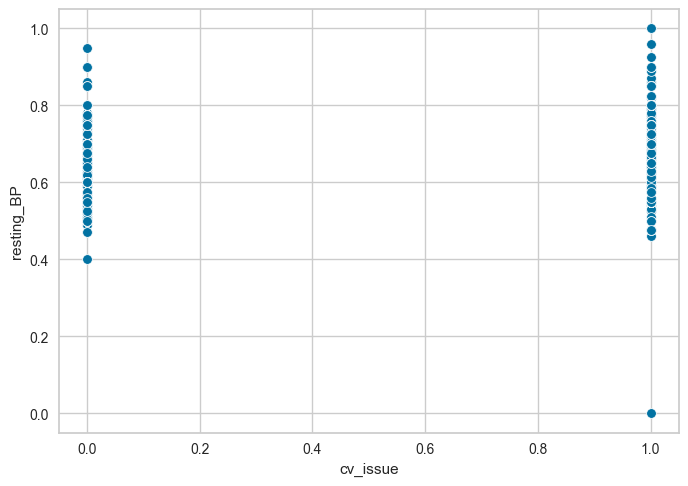

In [14]:
sns.scatterplot(x="cv_issue", y="resting_BP", data=model.dataset_transformed)

In [68]:
medical = medical[medical['resting_BP'] > 0.2]

In [79]:
model = setup(data = medical, target = 'cv_issue', normalize = True, normalize_method='minmax', train_size = 0.8, remove_outliers=True, bin_numeric_features=['age', 'max_HR'],session_id=123, log_experiment=True, experiment_name='medical', fold=10)

,Description,Value
0,Session id,123
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(917, 12)"
4,Transformed data shape,"(880, 19)"
5,Transformed train set shape,"(696, 19)"
6,Transformed test set shape,"(184, 19)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


<Axes: xlabel='cv_issue', ylabel='resting_BP'>

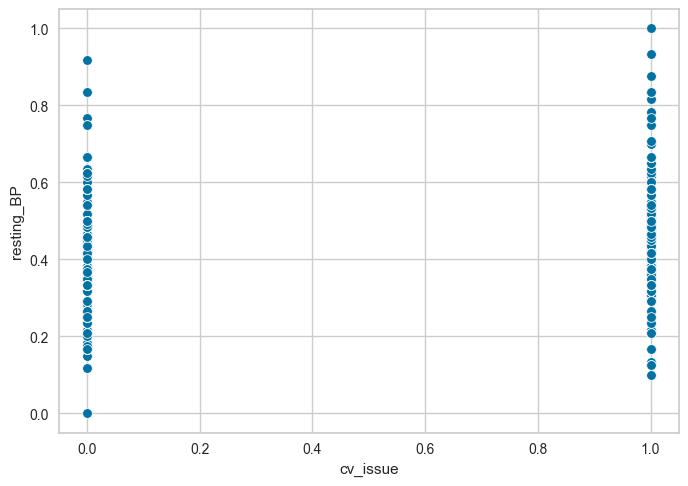

In [80]:
sns.scatterplot(x="cv_issue", y="resting_BP", data=model.dataset_transformed)

In [81]:
#Print ordinal, numeric and categorical features
print(f'Ordinal features: {model._fxs["Ordinal"]}')
print(f'Numeric features: {model._fxs["Numeric"]}')
print(f'Categorical features: {model._fxs["Categorical"]}')

Ordinal features: {'gender': ['F', 'M'], 'exercise_angina': ['N', 'Y']}
Numeric features: ['age', 'resting_BP', 'cholesterol', 'fasting_BS', 'max_HR', 'old_peak']
Categorical features: ['gender', 'chest_pain', 'resting_ECG', 'exercise_angina', 'ST_slope']


In [82]:
model.dataset_transformed

,age,gender,chest_pain_NAP,chest_pain_ASY,chest_pain_ATA,chest_pain_TA,resting_BP,cholesterol,fasting_BS,resting_ECG_Normal,resting_ECG_ST,resting_ECG_LVH,max_HR,exercise_angina,old_peak,ST_slope_Flat,ST_slope_Up,ST_slope_Down,cv_issue
316,0.50,1.0,1.0,0.0,0.0,0.0,0.208333,0.000000,1.0,1.0,0.0,0.0,0.75,0.0,0.353659,1.0,0.0,0.0,1
435,0.75,1.0,0.0,1.0,0.0,0.0,0.600000,0.000000,0.0,0.0,1.0,0.0,0.25,1.0,0.317073,0.0,1.0,0.0,0
904,0.50,1.0,0.0,0.0,1.0,0.0,0.333333,0.398010,0.0,1.0,0.0,0.0,1.00,0.0,0.317073,0.0,0.0,1.0,0
469,0.50,1.0,0.0,0.0,1.0,0.0,0.366667,0.371476,1.0,1.0,0.0,0.0,0.75,0.0,0.560976,1.0,0.0,0.0,0
372,0.75,1.0,0.0,1.0,0.0,0.0,0.875000,0.000000,0.0,1.0,0.0,0.0,0.00,1.0,0.317073,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.00,1.0,0.0,1.0,0.0,0.0,0.125000,0.000000,1.0,0.0,1.0,0.0,0.75,0.0,0.317073,0.0,1.0,0.0,1
629,0.50,0.0,0.0,1.0,0.0,0.0,0.400000,0.502488,0.0,0.0,0.0,1.0,0.75,0.0,0.317073,0.0,1.0,0.0,0
810,0.50,0.0,0.0,0.0,1.0,0.0,0.458333,0.414594,0.0,0.0,0.0,1.0,0.75,0.0,0.487805,1.0,0.0,0.0,0
306,0.50,1.0,0.0,1.0,0.0,0.0,0.291667,0.000000,1.0,1.0,0.0,0.0,0.75,0.0,0.329268,1.0,0.0,0.0,1


In [83]:
best = model.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8745,0.9185,0.8990,0.8811,0.8882,0.7446,0.7484,5.3440
rf,Random Forest Classifier,0.8731,0.9284,0.9088,0.8709,0.8883,0.7413,0.7447,5.3840
lightgbm,Light Gradient Boosting Machine,0.8705,0.9285,0.9040,0.8701,0.8851,0.7365,0.7410,5.0290
lda,Linear Discriminant Analysis,0.8664,0.9220,0.9065,0.8608,0.8820,0.7279,0.7319,6.0750
ridge,Ridge Classifier,0.8650,0.0000,0.9040,0.8605,0.8806,0.7252,0.7292,5.3570
gbc,Gradient Boosting Classifier,0.8650,0.9294,0.9015,0.8641,0.8810,0.7248,0.7292,5.3640
lr,Logistic Regression,0.8595,0.9233,0.9013,0.8552,0.8766,0.7135,0.7173,5.0550
knn,K Neighbors Classifier,0.8582,0.8962,0.8892,0.8608,0.8737,0.7118,0.7149,4.7410
svm,SVM - Linear Kernel,0.8487,0.0000,0.8673,0.8631,0.8621,0.6942,0.7001,5.1290
nb,Naive Bayes,0.8486,0.8996,0.8717,0.8599,0.8646,0.6925,0.6949,5.4500


# Feature Selection

In [76]:
model2 = setup(data = medical, target = 'cv_issue', normalize = True, normalize_method='minmax', train_size = 0.8, remove_outliers=True, bin_numeric_features=['age', 'max_HR'],session_id=123, log_experiment=True, experiment_name='medical', fold=10, feature_selection=True, n_features_to_select=0.8)

,Description,Value
0,Session id,123
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(917, 12)"
4,Transformed data shape,"(880, 9)"
5,Transformed train set shape,"(696, 9)"
6,Transformed test set shape,"(184, 9)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


In [77]:
model2.dataset_transformed

,age,gender,chest_pain_ASY,resting_BP,cholesterol,max_HR,exercise_angina,old_peak,cv_issue
316,0.50,1.0,0.0,0.208333,0.000000,0.75,0.0,0.353659,1
435,0.75,1.0,1.0,0.600000,0.000000,0.25,1.0,0.317073,0
904,0.50,1.0,0.0,0.333333,0.398010,1.00,0.0,0.317073,0
469,0.50,1.0,0.0,0.366667,0.371476,0.75,0.0,0.560976,0
372,0.75,1.0,1.0,0.875000,0.000000,0.00,1.0,0.317073,1
...,...,...,...,...,...,...,...,...,...
333,0.00,1.0,1.0,0.125000,0.000000,0.75,0.0,0.317073,1
629,0.50,0.0,1.0,0.400000,0.502488,0.75,0.0,0.317073,0
810,0.50,0.0,0.0,0.458333,0.414594,0.75,0.0,0.487805,0
306,0.50,1.0,1.0,0.291667,0.000000,0.75,0.0,0.329268,1


In [78]:
best_select = model2.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8486,0.9046,0.8815,0.8553,0.8661,0.6914,0.6972,4.6040
qda,Quadratic Discriminant Analysis,0.8431,0.9136,0.8989,0.8358,0.8639,0.6786,0.6878,5.2100
rf,Random Forest Classifier,0.8391,0.9014,0.8766,0.8452,0.8589,0.6711,0.6754,5.7160
ridge,Ridge Classifier,0.8377,0.0000,0.8618,0.8499,0.8549,0.6704,0.6724,4.7590
lda,Linear Discriminant Analysis,0.8377,0.9017,0.8593,0.8517,0.8545,0.6706,0.6726,3.9960
lr,Logistic Regression,0.8350,0.9022,0.8596,0.8468,0.8522,0.6651,0.6670,5.0640
knn,K Neighbors Classifier,0.8254,0.8716,0.8445,0.8449,0.8427,0.6457,0.6499,4.6580
gbc,Gradient Boosting Classifier,0.8213,0.8961,0.8741,0.8196,0.8440,0.6345,0.6408,4.9950
lightgbm,Light Gradient Boosting Machine,0.8213,0.8953,0.8543,0.8312,0.8414,0.6363,0.6390,4.4150
et,Extra Trees Classifier,0.8199,0.8940,0.8446,0.8366,0.8394,0.6338,0.6361,4.0410


# Model Tuning

In [39]:
best = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8649,0.9176,0.9024,0.8605,0.8810,0.7249,0.7260
1,0.8243,0.8725,0.8537,0.8333,0.8434,0.6434,0.6437
2,0.9189,0.9409,0.9024,0.9487,0.9250,0.8369,0.8381
3,0.8514,0.9242,0.9268,0.8261,0.8736,0.6947,0.7015
4,0.7671,0.8438,0.8537,0.7609,0.8046,0.5188,0.5241
5,0.8493,0.9421,0.8293,0.8947,0.8608,0.6971,0.6995
6,0.8082,0.9019,0.8000,0.8421,0.8205,0.6149,0.6159
7,0.8904,0.9292,0.9250,0.8810,0.9024,0.7776,0.7788
8,0.9178,0.9708,0.9000,0.9474,0.9231,0.8350,0.8362


In [84]:
best.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [ ]:
tuned_best = tune_model(best, return_tuner=True) 

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:28:54
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# Model Evaluation

In [42]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predict best model

In [27]:
best_predict = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8696,0.9183,0.8529,0.9062,0.8788,0.7379,0.7395


In [28]:
best_predict.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue,prediction_label,prediction_score
862,65,F,NAP,155,269,0,Normal,148,N,0.8,Up,0,0,1.00
161,49,M,ASY,128,212,0,Normal,96,Y,0.0,Flat,1,1,0.95
872,55,M,ASY,132,353,0,Normal,132,Y,1.2,Flat,1,1,0.99
47,50,M,ATA,140,216,0,Normal,170,N,0.0,Up,0,0,1.00
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1,1,0.97


In [30]:
final_best = finalize_model(best)
save_model(final_best, 'medical_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\SHERMA~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'resting_BP', 'cholesterol',
                                              'fasting_BS', 'max_HR',
                                              'old_peak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight

In [31]:
load_pipeline = load_model('medical_pipeline')
load_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\SHERMA~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'resting_BP', 'cholesterol',
                                             'fasting_BS', 'max_HR',
                                             'old_peak'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)

# Model Registry

In [50]:
# Calculate evaluation metrics
y_true = best_predict['cv_issue']
y_pred = best_predict['prediction_label']
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)
mlflow.end_run()
# Register the pipeline with MLflow
with mlflow.start_run() as run:
    mlflow.log_param('train_size', 0.8)
    mlflow.log_param('transformation', True)
    mlflow.log_param('normalize', True)
    mlflow.log_param('remove_outliers', True)
    mlflow.log_param('bin_numeric_features', ['age', 'max_HR'])
    mlflow.log_param('fold', 5)
    
    # Log metrics
    mlflow.log_metric('MAE', mae)
    mlflow.log_metric('MSE', mse)
    mlflow.log_metric('RMSE', rmse)
    mlflow.log_metric('R2', r2)
    
    # Log the experiment name and run ID
    mlflow.set_experiment('medical_final')
    mlflow.log_param('experiment_name', 'medical_final')
    mlflow.log_param('run_id', run.info.run_id)
    
    # Log the pipeline object using mlflow.sklearn
    mlflow.sklearn.log_model(sk_model=best, registered_model_name='medical_final', artifact_path='sk_model')


Successfully registered model 'medical_final'.
2023/08/20 21:36:28 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: medical_final, version 1
Created version '1' of model 'medical_final'.
